In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [14]:
from google.colab import files
uploaded = files.upload()

Saving Life Expectancy Data.csv to Life Expectancy Data (1).csv


In [24]:
df = pd.read_csv("Life Expectancy Data.csv")
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


Исследовать данные.

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


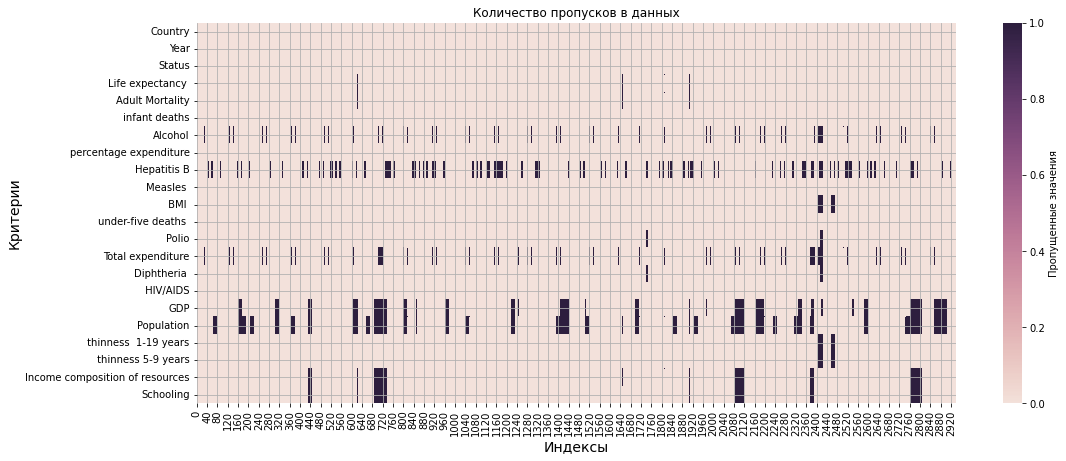

In [22]:
print(df.isna().sum())
plt.figure(figsize=(17,7))
cmap = sns.cubehelix_palette(as_cmap=True, light=.9)
sns.heatmap(df.isna().transpose(), cmap=cmap, cbar_kws={'label': 'Пропущенные значения'})
plt.xlabel("Индексы", fontsize=14)  
plt.ylabel("Критерии", fontsize=14)
plt.title("Количество пропусков в данных")
plt.grid()
plt.show()

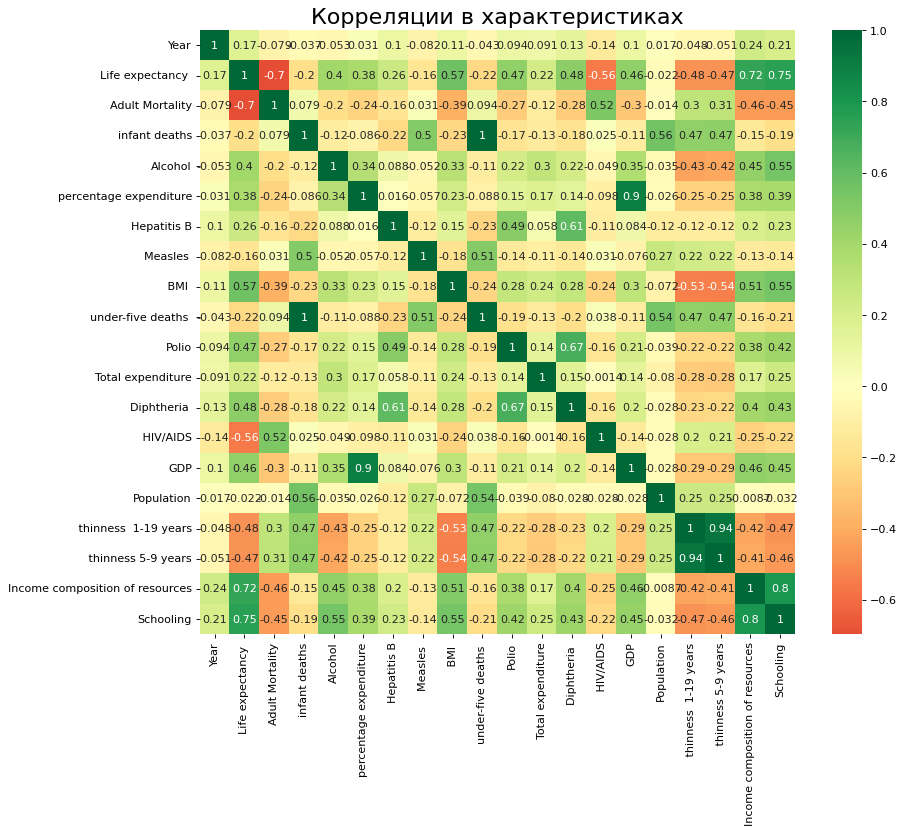

In [5]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Корреляции в характеристиках', fontsize=20)
plt.show()

In [ ]:
df['Status'].unique()

Построить модель линейной регрессии.

In [31]:
df = df.dropna()

In [ ]:
cntr = list(df['Country'].unique())
for i in range(len(df['Country'])):
  df.loc[i, 'Country'] = cntr.index(df.loc[i, 'Country'])
  df.loc[i, 'Year'] = int(df.loc[i, 'Year']) - 2000
  if df.loc[i, 'Status'] == "Developing":
    df.loc[i, 'Status'] = 0
  else:
    df.loc[i, 'Status'] = 1
df = df[df['Life expectancy '].isnull() == False]
df = df[df['Alcohol'].isnull() == False]
df = df[df['Hepatitis B'].isnull() == False]
df = df[df[' BMI '].isnull() == False]
df = df[df['Total expenditure'].isnull() == False]
df = df[df['GDP'].isnull() == False]
df = df[df['Population'].isnull() == False]
df

In [27]:
y = df['Life expectancy ']
x = df.drop(columns='Life expectancy ')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

Получить коэффиценты уравнения линейной регрессии.

In [29]:
w0 = model.intercept_
w1 = model.coef_
print(w0, w1)

54.484197906964745 [ 1.18159372e-04 -1.44023557e-01  7.27461738e-01 -1.65905485e-02
  1.02680607e-01 -9.16599423e-02  2.75076179e-04 -4.26765555e-03
 -7.75288854e-06  3.22306842e-02 -7.81549482e-02  1.03484305e-02
  9.73591308e-02  1.03418437e-02 -4.42293508e-01  3.48147524e-05
  7.97321533e-10 -4.14353364e-02 -9.80414108e-03  1.00191681e+01
  8.49717764e-01]


Написать уравнение линейной регрессии.

In [30]:
ans = str(w0)
for i in range(13):
  ans = ans + ' + ' + str(w1[i]) + ' * ' + list(df.columns)[i]
print(ans)

54.484197906964745 + 0.00011815937245631346 * Country + -0.14402355727075652 * Year + 0.7274617376982547 * Status + -0.016590548504190283 * Life expectancy  + 0.10268060722290967 * Adult Mortality + -0.09165994234461558 * infant deaths + 0.0002750761789133537 * Alcohol + -0.004267655548149074 * percentage expenditure + -7.752888544269142e-06 * Hepatitis B + 0.03223068415682089 * Measles  + -0.07815494824204845 *  BMI  + 0.01034843050799147 * under-five deaths  + 0.09735913079374152 * Polio


Визуализировать данные и полученное уравнение линейной регрессии.

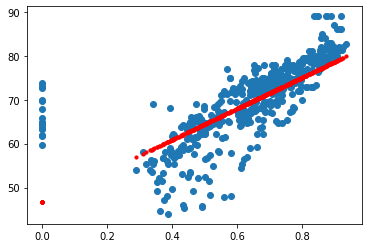

In [58]:
import matplotlib.pyplot as plt
y_pred = model.predict(X_test)
for col in X_test.columns:
  plt.scatter(X_test[col], y_test)
  plt.scatter(X_test[col], y_pred, color='red', s=10)
  plt.show()

Оценивать полученную модель с помощью MSE, MAE, R2.

In [12]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error: 2.8732413813014803
Mean Squared Error: 13.974329786906985
R2 score: 0.8225380319200436


Сделать письменный вывод получившихся результатов (хорошая или плохая получлась оценка MSE и почему), привести восстановленное линейное уравнение регрессии, сделать вывод какие из признаков оказались наиболее значимыми, какие нет и почему.

Оценки как MSE, так и R2 показывают неплохие результаты работы модели. Мне кажется, что это может быть обусловлено немаленьким объёмом входных данных, а также ограниченным промежутком возможных ответов (возрастов).

In [13]:
mas = []
i = 0
for key in X_train.keys():
  mas.append((key, w1[i]))
  i += 1
mas.sort(key=lambda x: abs(x[1]))
mas

[('Population', 1.2981573756048673e-11),
 ('Measles ', -8.019114615153982e-06),
 ('GDP', 3.400825798853594e-05),
 ('percentage expenditure', 0.00020063662184923418),
 ('Country', 0.0007670485996810719),
 ('Hepatitis B', -0.002042716103045461),
 (' thinness  1-19 years', 0.003797346135890654),
 ('Diphtheria ', 0.007839143319173455),
 ('Polio', 0.013182675343291544),
 ('Adult Mortality', -0.016808241769305773),
 (' BMI ', 0.032939835368412336),
 (' thinness 5-9 years', -0.0685383662470984),
 ('Year', -0.07213373151664819),
 ('under-five deaths ', -0.07908611575391829),
 ('Alcohol', -0.09215210657782126),
 ('Total expenditure', 0.10426961894742352),
 ('infant deaths', 0.10494285187725877),
 (' HIV/AIDS', -0.45671445619118556),
 ('Schooling', 0.8676415245832019),
 ('Status', 0.9117630265166293),
 ('Income composition of resources', 9.519980614833814)]

Видно, что наибольшее влияние (положительное или отрицательное) на продолжительности жизни оказывают такие аспекты, как доходоы, положение в обществе, школьное образование, наличие ВИЧ/СПИД, алкоголизм. Наименьшее влияние оказывает численность населения страны, что вполне логично.

In [ ]:
dfa = df.drop(columns = ['Population','Measles ','GDP','percentage expenditure','Country','Hepatitis B',' thinness  1-19 years','Diphtheria '])
dfa

In [43]:
y = dfa['Life expectancy ']
x = dfa.drop(columns='Life expectancy ')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
model = LinearRegression()
model.fit(X_train, y_train)
w0 = model.intercept_
w1 = model.coef_

In [ ]:
w1

In [ ]:
y_pred = model.predict(X_test)
for col in X_test.columns:
  plt.scatter(X_test[col], y_test)
  plt.scatter(X_test[col], y_pred, color='red', s=10)
  plt.show()

In [ ]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

In [55]:
y = dfa['Life expectancy ']
x = dfa[['Income composition of resources']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
model = LinearRegression()
model.fit(X_train, y_train)
w0 = model.intercept_
w1 = model.coef_

In [56]:
w0

46.658404531324074

In [57]:
w1

array([35.51699282])

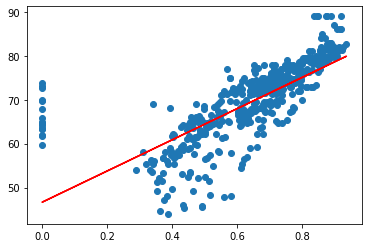

In [64]:
import matplotlib.pyplot as plt
y_pred = model.predict(X_test)
plt.scatter(X_test['Income composition of resources'], y_test)
plt.plot(X_test['Income composition of resources'], y_pred, color='red')
plt.show()